<a href="https://colab.research.google.com/github/bala-baskar/deep_learning_path/blob/main/courses/IITM_CS7015_Deep%20learning/NN_backpropagation_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
x1 = np.random.random(100)
x2 = np.random.random(100)
x3 = np.random.random(100)

X = np.array([x1,x2,x3]).T
X.shape

(100, 3)

In [3]:
fn = lambda x1,x2,x3: np.abs(2*x1 + 5*x2 -3*x3)

In [4]:
y = fn(x1,x2,x3)
y

array([1.01986877, 4.83106077, 2.55088165, 1.04450786, 3.03058247,
       1.53085903, 1.86366721, 3.51960268, 2.3310361 , 1.31862055,
       0.15627511, 0.67024055, 4.35748976, 3.79247219, 1.39413105,
       4.01236471, 3.65064578, 0.25711106, 3.37778633, 0.73149926,
       3.28806789, 3.05451841, 1.89328237, 0.1798359 , 1.25620868,
       2.97392194, 1.57038973, 4.15282862, 1.45654988, 0.75322146,
       0.91771081, 0.05632398, 1.00128163, 2.10829385, 6.06008362,
       1.06545301, 2.36086356, 3.63749112, 1.25019718, 5.20788336,
       2.23493719, 0.61252043, 0.1895736 , 2.21255625, 1.89539259,
       1.27547638, 2.38669138, 0.6535667 , 1.54004562, 0.79608713,
       5.59715201, 1.59278191, 0.05006223, 3.28615249, 5.61557399,
       1.38362104, 0.72919842, 2.11197441, 0.43154121, 4.00021292,
       0.77124856, 0.73406567, 4.40487153, 1.83739112, 1.61880135,
       3.03959879, 0.20529845, 0.42953426, 0.72549646, 4.04746306,
       2.50422788, 1.94996968, 0.02970743, 0.02368008, 3.10555

<Axes: ylabel='Count'>

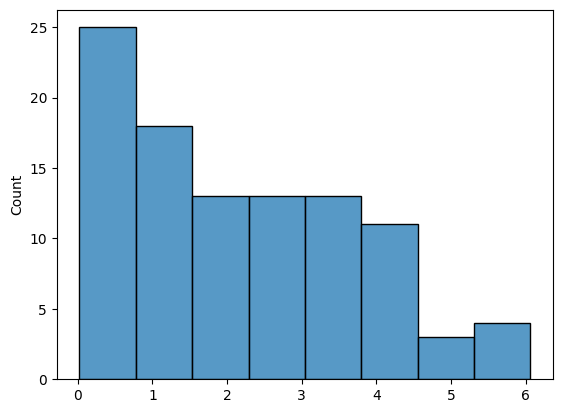

In [5]:
sns.histplot(y)

<Axes: >

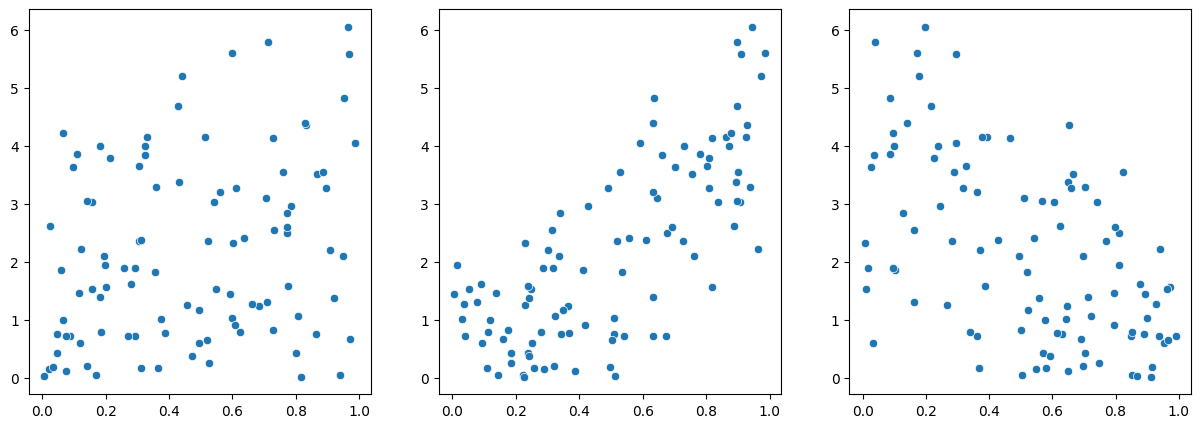

In [6]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x=x1,y=y,ax=ax[0])
sns.scatterplot(x=x2,y=y,ax=ax[1])
sns.scatterplot(x=x3,y=y,ax=ax[2])

In [7]:
def y_cat(x):
  if x < 1:
    return 0
  elif x <=2:
    return 1
  elif x > 5:
    return 3
  else:
    return 2

In [8]:
target = np.array([y_cat(x) for x in y]).reshape(-1,1)
target.shape

(100, 1)

In [9]:
n_values = np.max(target) + 1
y_true = np.squeeze(np.eye(n_values)[target])
y_true[:3]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [10]:
np.sum(y_true,axis=0)

array([29., 23., 43.,  5.])

In [11]:
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def der_sigmoid(a):
  return a * (1 - a)

In [12]:
INPUT_SIZE = X.shape[1]
HIDDEN_LAYER = (2,2)
OUTPUT_SIZE = target.shape[1]
NUM_LAYERS = len(HIDDEN_LAYER) + 1
print(INPUT_SIZE,HIDDEN_LAYER,OUTPUT_SIZE,NUM_LAYERS)

3 (2, 2) 1 3


In [13]:
# Forward propagation for single row
h0 = X[0]
h0.T

array([0.37454012, 0.03142919, 0.64203165])

In [14]:
# Weights initialisation
w1 = np.random.random((2,3))
w2 = np.random.random((2,2))
w3 = np.random.random((4,2))
b1 = np.random.random((2,1))
b2 = np.random.random((2,1))
b3 = np.random.random((4,1))
w1,b1,w2,b2,w3,b3

(array([[0.05168172, 0.53135463, 0.54063512],
        [0.6374299 , 0.72609133, 0.97585208]]),
 array([[0.15643704],
        [0.2502429 ]]),
 array([[0.51630035, 0.32295647],
        [0.79518619, 0.27083225]]),
 array([[0.54922666],
        [0.71459592]]),
 array([[0.43897142, 0.07845638],
        [0.02535074, 0.96264841],
        [0.83598012, 0.69597421],
        [0.40895294, 0.17329432]]),
 array([[0.66019738],
        [0.2799339 ],
        [0.95486528],
        [0.73789692]]))

In [15]:
a1 = np.dot(w1,h0.T).reshape(-1,1) + b1
a1

array([[0.53959882],
       [1.13833435]])

In [16]:
h1 = sigmoid(a1)
h1

array([[0.63171909],
       [0.75737369]])

In [17]:
a2 = np.dot(w2,h1).reshape(-1,1) + b2
a2

array([[1.11998219],
       [1.42205144]])

In [18]:
h2 = sigmoid(a2)
h2

array([[0.75398541],
       [0.80565982]])

In [19]:
a3 = np.dot(w3,h2).reshape(-1,1) + b3
a3

array([[1.05438458],
       [1.07461513],
       [2.14590055],
       [1.18585774]])

In [20]:
h3 = softmax(a3)
h3

array([[0.1628736 ],
       [0.16620218],
       [0.48516568],
       [0.18575853]])

In [21]:
h3.shape

(4, 1)

In [22]:
y_pred = h3
loss_function = -1 * np.log(np.dot(y_true[0],h3)) # cross entropy function that multiplies probability 1 of true class with pred probability of predicted class (Summ -> y_true[i] * log(y_pred[i]))
loss_function

array([1.79455026])

In [23]:
# Forward propagation
a1 = np.dot(w1,h0.T).reshape(-1,1) + b1
h1 = sigmoid(a1)
a2 = np.dot(w2,h1).reshape(-1,1) + b2
h2 = sigmoid(a2)
a3 = np.dot(w3,h2).reshape(-1,1) + b3
h3 = softmax(a3)
y_pred = h3
loss_function = -1 * np.log(np.dot(y_true[0],h3))

In [24]:
y_true[0], -1/h3

(array([0., 1., 0., 0.]),
 array([[-6.13973028],
        [-6.01676812],
        [-2.06115157],
        [-5.38333273]]))

In [25]:
# Back propagation
# Gradient with output layer
d_loss_ypred = np.dot(y_true[0], -1/h3) * y_true[0].reshape(-1,1) # vector with shape equal to output size
grad_loss_aL = -1 * (y_true[0].reshape(-1,1) - h3)
grad_loss_aL

array([[ 0.1628736 ],
       [-0.83379782],
       [ 0.48516568],
       [ 0.18575853]])

In [26]:
# same as Yhat - Y
h3 - y_true[0].reshape(-1,1)

array([[ 0.1628736 ],
       [-0.83379782],
       [ 0.48516568],
       [ 0.18575853]])

In [27]:
# compute grad of h2
grad_h2 = np.dot(w3.T,grad_loss_aL)
grad_h2

array([[ 0.53191482],
       [-0.42002198]])

In [28]:
# compute grad of a2
grad_a2 = grad_h2 * der_sigmoid(h2)
grad_a2

array([[ 0.09866563],
       [-0.06576371]])

In [29]:
grad_loss_aL, h2.T

(array([[ 0.1628736 ],
        [-0.83379782],
        [ 0.48516568],
        [ 0.18575853]]),
 array([[0.75398541, 0.80565982]]))

In [30]:
# compute grad of w3
grad_w3 = grad_loss_aL * h2.T
assert grad_w3.shape == w3.shape
grad_w3

array([[ 0.12280432,  0.13122072],
       [-0.62867139, -0.6717574 ],
       [ 0.36580784,  0.39087849],
       [ 0.14005923,  0.14965819]])

In [31]:
grad_b3 = grad_loss_aL
assert grad_b3.shape == b3.shape
grad_b3

array([[ 0.1628736 ],
       [-0.83379782],
       [ 0.48516568],
       [ 0.18575853]])

## Parameterize the NN

In [32]:
INPUT_SIZE = X.shape[1]
HIDDEN_LAYER = (3,3,3)
OUTPUT_SIZE = y_true.shape[1]
NUM_LAYERS = len(HIDDEN_LAYER) + 1
print(INPUT_SIZE,HIDDEN_LAYER,OUTPUT_SIZE,NUM_LAYERS)

3 (3, 3, 3) 4 4


In [33]:
w,b = {},{}
# Weights initialisation
for i in range(NUM_LAYERS):
  if i == 0:
    w_size = (HIDDEN_LAYER[i],INPUT_SIZE)
    b_size = (HIDDEN_LAYER[i],1)
  elif i == NUM_LAYERS - 1:
    w_size = (OUTPUT_SIZE,HIDDEN_LAYER[-1])
    b_size = (OUTPUT_SIZE,1)
  else:
    w_size = (HIDDEN_LAYER[i],HIDDEN_LAYER[i-1])
    b_size = (HIDDEN_LAYER[i],1)
  w[i+1] = np.random.random(w_size)
  b[i+1] = np.random.random(b_size)

In [34]:
w,b

({1: array([[0.55435405, 0.61172075, 0.41960006],
         [0.24773099, 0.35597268, 0.75784611],
         [0.01439349, 0.11607264, 0.04600264]]),
  2: array([[0.47417383, 0.09783416, 0.49161588],
         [0.47347177, 0.17320187, 0.43385165],
         [0.39850473, 0.6158501 , 0.63509365]]),
  3: array([[0.50313626, 0.85648984, 0.65869363],
         [0.16293443, 0.07056875, 0.64241928],
         [0.02651131, 0.58577558, 0.94023024]]),
  4: array([[0.45825289, 0.54561679, 0.94146481],
         [0.38610264, 0.96119056, 0.90535064],
         [0.19579113, 0.0693613 , 0.100778  ],
         [0.01822183, 0.09444296, 0.68300677]])},
 {1: array([[0.0407288 ],
         [0.85546058],
         [0.70365786]]),
  2: array([[0.04530401],
         [0.37461261],
         [0.62585992]]),
  3: array([[0.57547418],
         [0.38816993],
         [0.64328822]]),
  4: array([[0.07118865],
         [0.31897563],
         [0.84487531],
         [0.02327194]])})

In [35]:
a, h = {}, {}
# Forward propagation for single row
h[0] = X[0].T

for L in range(1,NUM_LAYERS+1):
  a[L] = np.dot(w[L],h[L-1]).reshape(-1,1) + b[L]
  if L != NUM_LAYERS:
    h[L] = sigmoid(a[L])
  else:
    h[L] = softmax(a[L])
    loss_function = -1 * np.log(np.dot(y_true[0],h[L]))

print(loss_function)

[0.79817706]


In [36]:
a, h

({1: array([[0.53697904],
         [1.4459949 ],
         [0.74223202]]),
  2: array([[0.75680647],
         [1.10753888],
         [1.80608316]]),
  3: array([[2.12748055],
         [1.10388338],
         [1.90919564]]),
  4: array([[1.7103584 ],
         [2.17431349],
         [1.15968351],
         [0.70532964]])},
 {0: array([0.37454012, 0.03142919, 0.64203165]),
  1: array([[0.63110939],
         [0.80938128],
         [0.67748374]]),
  2: array([[0.68065998],
         [0.75167   ],
         [0.85888782]]),
  3: array([[0.89354559],
         [0.75098703],
         [0.87092876]]),
  4: array([[0.28304988],
         [0.45014881],
         [0.1631954 ],
         [0.10360591]])})

In [37]:
# Backpropagation
grad_h, grad_a, grad_w, grad_b = {},{},{},{}
grad_a[NUM_LAYERS] =  h3 - y_true[0].reshape(-1,1)

for L in range(NUM_LAYERS,0,-1):
  grad_w[L] = grad_a[L] * h[L-1].T
  grad_b[L] = grad_a[L]
  grad_h[L-1] = np.dot(w[L].T,grad_a[L])
  grad_a[L-1] = grad_h[L-1] * der_sigmoid(h[L-1])

In [38]:
grad_h, grad_a, grad_w, grad_b

({3: array([[-0.14891824],
         [-0.66137671],
         [-0.42577126]]),
  2: array([[-0.0285479 ],
         [-0.04889676],
         [-0.13378682]]),
  1: array([[-0.01372553],
         [-0.01217388],
         [-0.01730841]]),
  0: array([[-0.00229114],
         [-0.00306229],
         [-0.00293819]])},
 {4: array([[ 0.1628736 ],
         [-0.83379782],
         [ 0.48516568],
         [ 0.18575853]]),
  3: array([[-0.01416538],
         [-0.12368109],
         [-0.04786174]]),
  2: array([[-0.00620523],
         [-0.00912718],
         [-0.0162149 ]]),
  1: array([[-0.00319545],
         [-0.00187822],
         [-0.00378188]]),
  0: array([[-5.36721369e-04, -6.97454036e-05, -5.26565201e-04],
         [-7.17371445e-04, -9.32203632e-05, -7.03796906e-04],
         [-6.88300066e-04, -8.94426209e-05, -6.75275634e-04]])},
 {4: array([[ 0.14553499,  0.12231596,  0.14185131],
         [-0.74503636, -0.62617134, -0.72617849],
         [ 0.43351765,  0.36435313,  0.42254474],
         [ 0.1

### Create gradient descent algorithm

In [50]:
X.shape

(100, 3)

In [115]:
INPUT_SIZE = X.shape[1]
HIDDEN_LAYER = (100,100)
OUTPUT_SIZE = y_true.shape[1]
NUM_LAYERS = len(HIDDEN_LAYER) + 1
learning_rate = 0.01
epochs = 100
BATCH_SIZE = 4
print(INPUT_SIZE,HIDDEN_LAYER,OUTPUT_SIZE,NUM_LAYERS,BATCH_SIZE,learning_rate)

3 (100, 100) 4 3 4 0.01


In [116]:
w,b = {},{}
# Weights initialisation
for i in range(NUM_LAYERS):
  if i == 0:
    w_size = (HIDDEN_LAYER[i],INPUT_SIZE)
    b_size = (HIDDEN_LAYER[i],1)
  elif i == NUM_LAYERS - 1:
    w_size = (OUTPUT_SIZE,HIDDEN_LAYER[-1])
    b_size = (OUTPUT_SIZE,1)
  else:
    w_size = (HIDDEN_LAYER[i],HIDDEN_LAYER[i-1])
    b_size = (HIDDEN_LAYER[i],1)
  w[i+1] = np.random.random(w_size)
  b[i+1] = np.random.random(b_size)

In [117]:
w[1].shape,w[2].shape,w[3].shape

((100, 3), (100, 100), (4, 100))

In [118]:
n_rows = X.shape[0]
y = y_true.copy()
a, h = {}, {}
grad_h, grad_a, grad_w, grad_b = {},{},{},{}
loss_function = 0
epoch_losses = []

for epoch in range(epochs):
  indices = np.arange(n_rows)
  #np.random.shuffle(indices)
  X,y = X[indices], y[indices]
  iterations = 0
  loss_fn = []
  grad_h, grad_a, grad_w, grad_b = {},{},{},{}
  for start_idx in range(0, n_rows, BATCH_SIZE):
    iterations += 1
    end_idx = start_idx + BATCH_SIZE
    if end_idx > n_rows:
      end_idx = n_rows + 1

    #Slice the batch
    X_batch = X[start_idx:end_idx]
    y_batch = y[start_idx:end_idx]

    # Forward propagation for mini batch
    h[0] = X_batch.T

    for L in range(1,NUM_LAYERS+1):
      a[L] = np.dot(w[L],h[L-1]) + b[L]
      # print(L,a[L].shape)
      if L != NUM_LAYERS:
        h[L] = sigmoid(a[L])
      else:
        h[L] = softmax(a[L])

    # Compute loss function for each iter
    loss_function = np.sum(-1 * (y_batch.T * np.log(h[NUM_LAYERS])),axis=0)
    loss_fn.append(loss_function)

    # Backpropagation
    grad_a[NUM_LAYERS] =  h[NUM_LAYERS] - y_batch.T

    for L in range(NUM_LAYERS,0,-1):
      grad_w[L] = np.dot(grad_a[L], h[L-1].T)
      grad_b[L] = grad_a[L]
      grad_h[L-1] = np.dot(w[L].T,grad_a[L])
      grad_a[L-1] = grad_h[L-1] * der_sigmoid(h[L-1])

    # Update the parameters
    for L in range(1,NUM_LAYERS+1):
      w[L] = w[L] - learning_rate * grad_w[L]
      b[L] = b[L] - learning_rate * grad_b[L]


  print(f"Epoch {epoch+1}",np.sum(loss_fn)/X.shape[0])
  epoch_losses.append(np.sum(loss_fn)/X.shape[0])

Epoch 1 1.720680152592176
Epoch 2 1.5428867098623527
Epoch 3 1.5356631608598759
Epoch 4 1.5326483981828938
Epoch 5 1.5298856042821254
Epoch 6 1.5273500361829304
Epoch 7 1.525019696444312
Epoch 8 1.5228749460379305
Epoch 9 1.5208982192113845
Epoch 10 1.5190737797690184
Epoch 11 1.5173875113375999
Epoch 12 1.5158267356930781
Epoch 13 1.5143800544429369
Epoch 14 1.5130372103227787
Epoch 15 1.511788965118144
Epoch 16 1.510626991806201
Epoch 17 1.5095437789622617
Epoch 18 1.5085325458246002
Epoch 19 1.5075871666808505
Epoch 20 1.5067021034508352
Epoch 21 1.5058723455074945
Epoch 22 1.5050933559113528
Epoch 23 1.5043610233427944
Epoch 24 1.5036716191059447
Epoch 25 1.5030217586531547
Epoch 26 1.5024083671430628
Epoch 27 1.5018286485999426
Epoch 28 1.5012800582900048
Epoch 29 1.5007602779718971
Epoch 30 1.5002671937159138
Epoch 31 1.4997988760188745
Epoch 32 1.4993535619708762
Epoch 33 1.4989296392562832
Epoch 34 1.4985256317941977
Epoch 35 1.4981401868446758
Epoch 36 1.4977720634255283
Epoch

<Axes: >

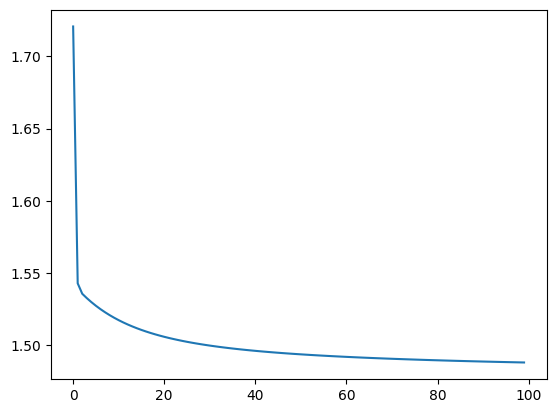

In [119]:
sns.lineplot(x=range(epochs),y=epoch_losses)